In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as sla
    
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Logistic Regression 
LR provides solution for binary classification problems. Value of Regression is probability of belonging to the class

Function which gives such possibility is Sigmoid function $ \delta(x) = \frac{1}{1 + e^{-x}} $

In [3]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))
data_ = np.linspace(-10, 10)

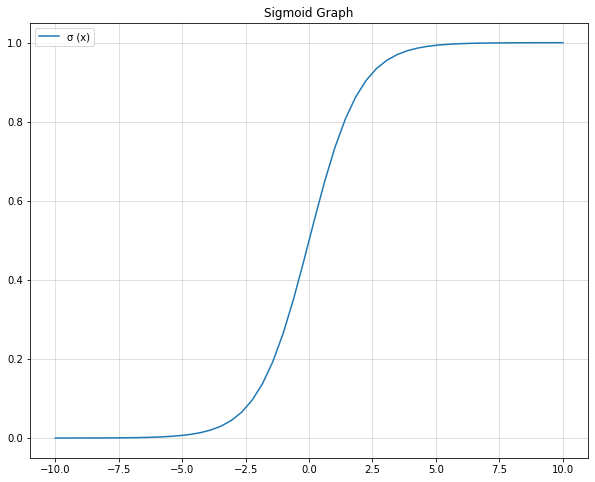

In [4]:
plt.figure(figsize = (10, 8))
plt.grid(alpha = 0.5)
plt.plot(data_, sigmoid(data_), label = "σ (x)")
plt.title("Sigmoid Graph")
plt.legend()
plt.plot()
None

### Prediction: 
$$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

### Logarithmic Loss:
$$ Loss(y_{pred}, y) = -(y\cdot log(y_{pred}) + (1-y)\cdot log(1 - y_{pred}))$$
### Gradient of LogLoss: 
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [5]:
def logit(x, w):
    return np.dot(x, w)

In [78]:
class LogisticRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, max_iter = 100, lr = 0.1):
        
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []
        
        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))
        
        return losses
        
    def predict_prob(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __calculate_gradient(self, X, y, y_pred):
        return logit(X.T, (y_pred - y)) / len(y)

    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10) # all nearly zeroes turns into 1*10^-10, ones into 0.999999999999
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

### Test: 

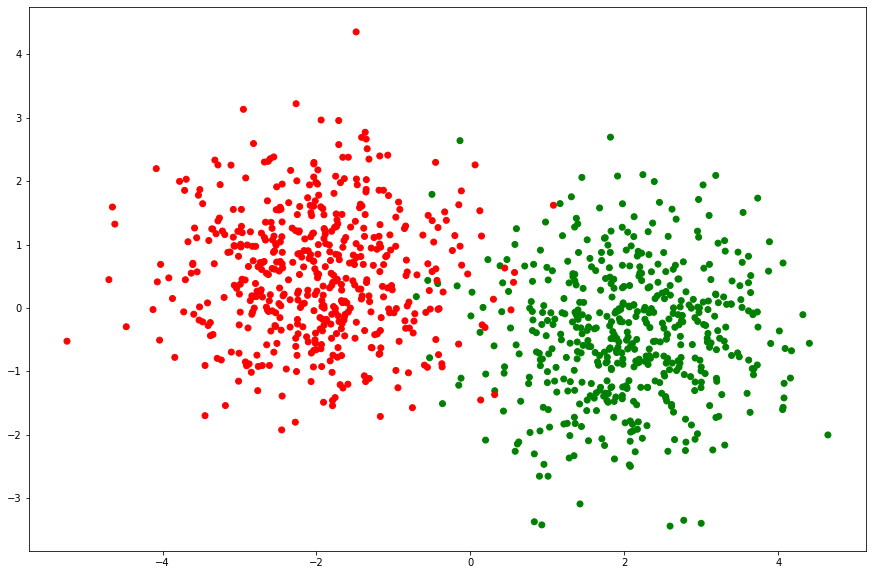

In [79]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000, centers = [[-2, 0.5], [2, -0.5]], cluster_std = 1, random_state = 42)
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype = str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize = (15, 10))
plt.scatter(X[:, 0], X[:, 1], c = colored_y)
plt.show()

In [80]:
clf = LogisticRegression()
clf.fit(X, y, max_iter = 1000)

w = clf.get_weights()

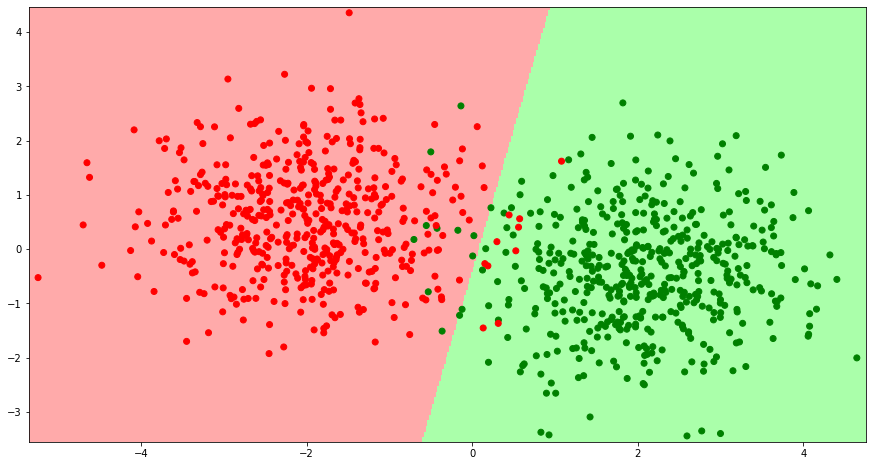

In [81]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

y_pred = y_pred.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, y_pred, cmap = cmap_light)

plt.scatter(X[:, 0], X[:, 1], c = colored_y)

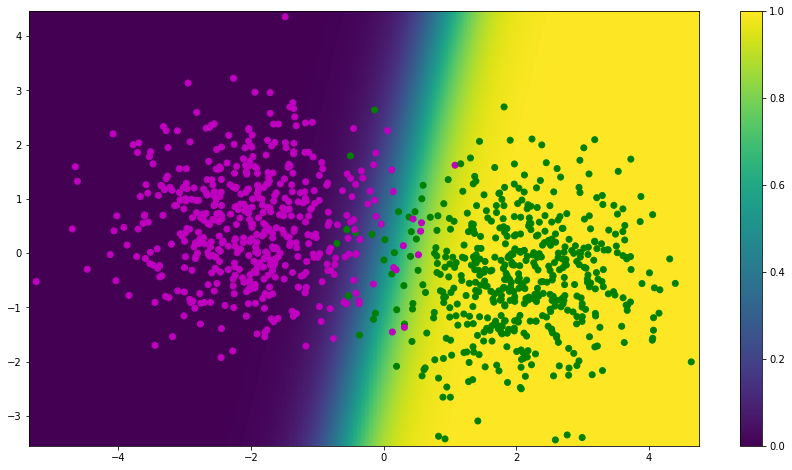

In [82]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)


for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,8))

y_pred = clf.predict_prob(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.pcolormesh(xx, yy, y_pred, cmap = plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()